In [2]:
import pandas as pd
import numpy as np

import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
from matplotlib import pyplot as plt
from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import logrank_test

# KM plot

In [5]:
TCGA = pd.read_csv('')
QHCG = pd.read_csv('')

In [14]:
def KP_plot(info_path,KP_type,group_type,thresold):

    clinical = info_path
    time = KP_type + '_time'
    status = KP_type + '_status'
    T = clinical[time]/12
    E = clinical[status]

    groups = clinical[group_type]
    ix = (groups >= thresold)
    t = np.linspace(0, 6, 100)
    plt.figure(figsize=(4, 4), dpi=400)
    ax = plt.subplot(111)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)


    kmf_high = KaplanMeierFitter()
    ax = kmf_high.fit(T[ix], E[ix], timeline=t, label='High risk (n={})'.format(sum(ix))).plot_survival_function(linewidth=1,show_censors=True, censor_styles={'ms': 5, 'marker': '+'},ax=ax,ci_show=False,color='#FF4B68')

    kmf_low = KaplanMeierFitter()
    ax = kmf_low.fit(T[~ix], E[~ix], timeline=t, label='Low risk (n={})'.format(len(ix)-sum(ix))).plot_survival_function(linewidth=1,show_censors=True, censor_styles={'ms': 5, 'marker': '+'},ax=ax,ci_show=False,color='#118DF0')


    legend = plt.legend(loc="best",fontsize=10)
    legend.get_frame().set_facecolor('none')
    legend.get_frame().set_linewidth(0.0)
    plt.xlabel('Time (years)',fontsize=12)
    plt.xlim([0, 6])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('Population at risk (%)',fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)


    results = logrank_test(T[ix], T[~ix], E[ix], E[~ix], alpha=.99).p_value
    plt.text(4.5,0.05,s='p={:.2e}'.format(results),fontsize=10)


def TCGA_plot(info_path,group_type,thresold):

    clinical = info_path
    T = (clinical['days_to_death'] + clinical['days_to_last_follow_up'])/365
    E = (~clinical['vital_status'].astype(bool)).astype(int)


    groups = clinical[group_type]
    ix = (groups >= thresold)
    t = np.linspace(0, 10, 100)
    plt.figure(figsize=(4, 4), dpi=400)
    ax = plt.subplot(111)


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)

    kmf_high = KaplanMeierFitter()
    ax = kmf_high.fit(T[ix], E[ix], timeline=t, label='High risk (n={})'.format(sum(ix))).plot_survival_function(linewidth=1,show_censors=True, censor_styles={'ms': 5, 'marker': '+'},ax=ax,ci_show=False,color='#FF4B68')

    kmf_low = KaplanMeierFitter()
    ax = kmf_low.fit(T[~ix], E[~ix], timeline=t, label='Low risk (n={})'.format(len(ix)-sum(ix))).plot_survival_function(linewidth=1,show_censors=True, censor_styles={'ms': 5, 'marker': '+'},ax=ax,ci_show=False,color='#118DF0')
    
    legend = plt.legend(loc="upper right",fontsize=10)
    legend.get_frame().set_facecolor('none')
    legend.get_frame().set_linewidth(0.0)
    plt.xlabel('Time (years)',fontsize=12)
    plt.xlim([0, 10])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('Population at risk (%)',fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)



    results = logrank_test(T[ix], T[~ix], E[ix], E[~ix], alpha=.99).p_value
    plt.text(7.5,0.05,s='p={:.2e}'.format(results),fontsize=10)
    print('p-value: {}'.format(results))

p-value: 2.481769658678383e-09


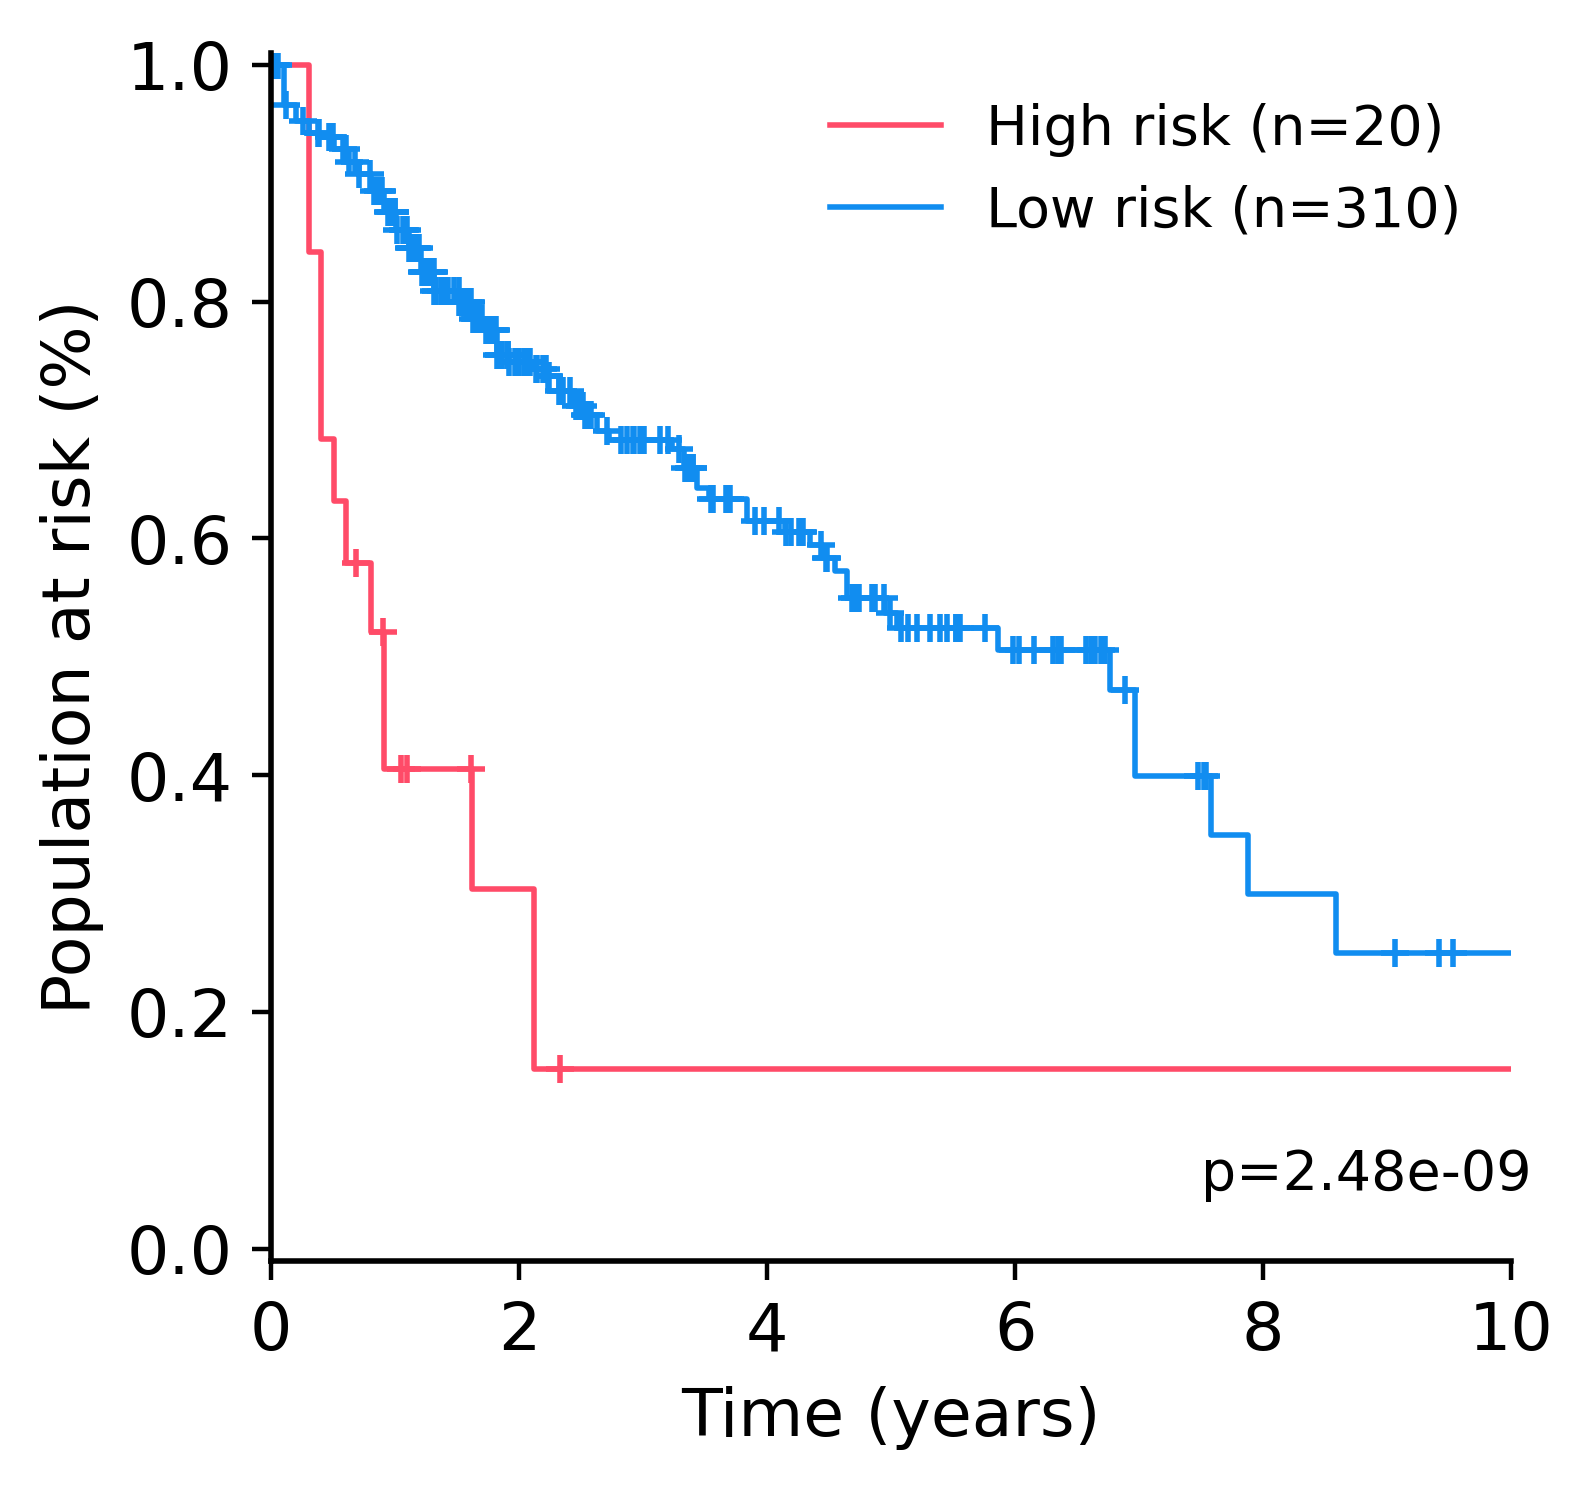

In [23]:
TCGA_plot(TCGA,'TIN10',0.018925978874988)

p-value: 2.7716807449224613e-05


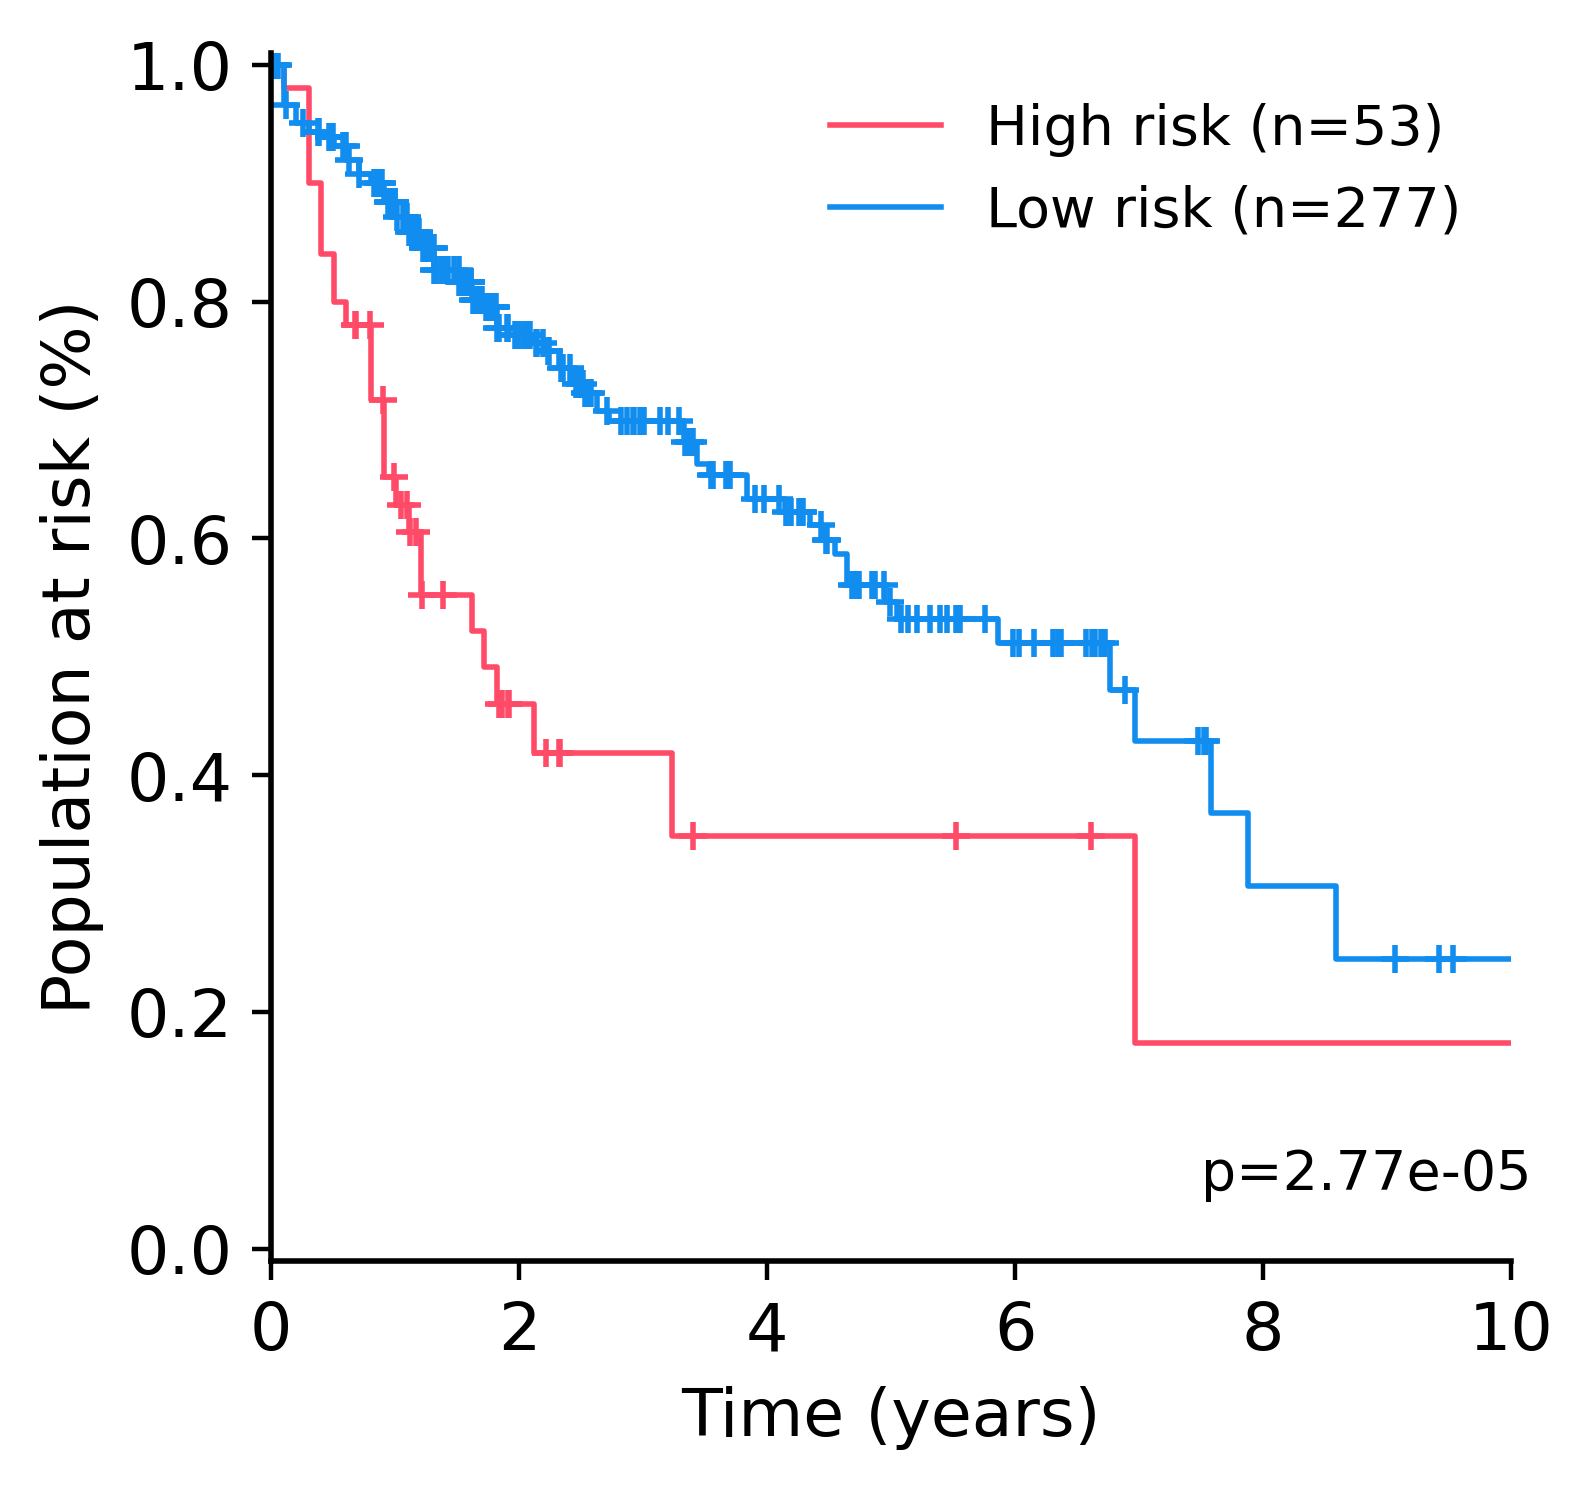

In [18]:
TCGA_plot(TCGA,'NEC',0.066076159595081)

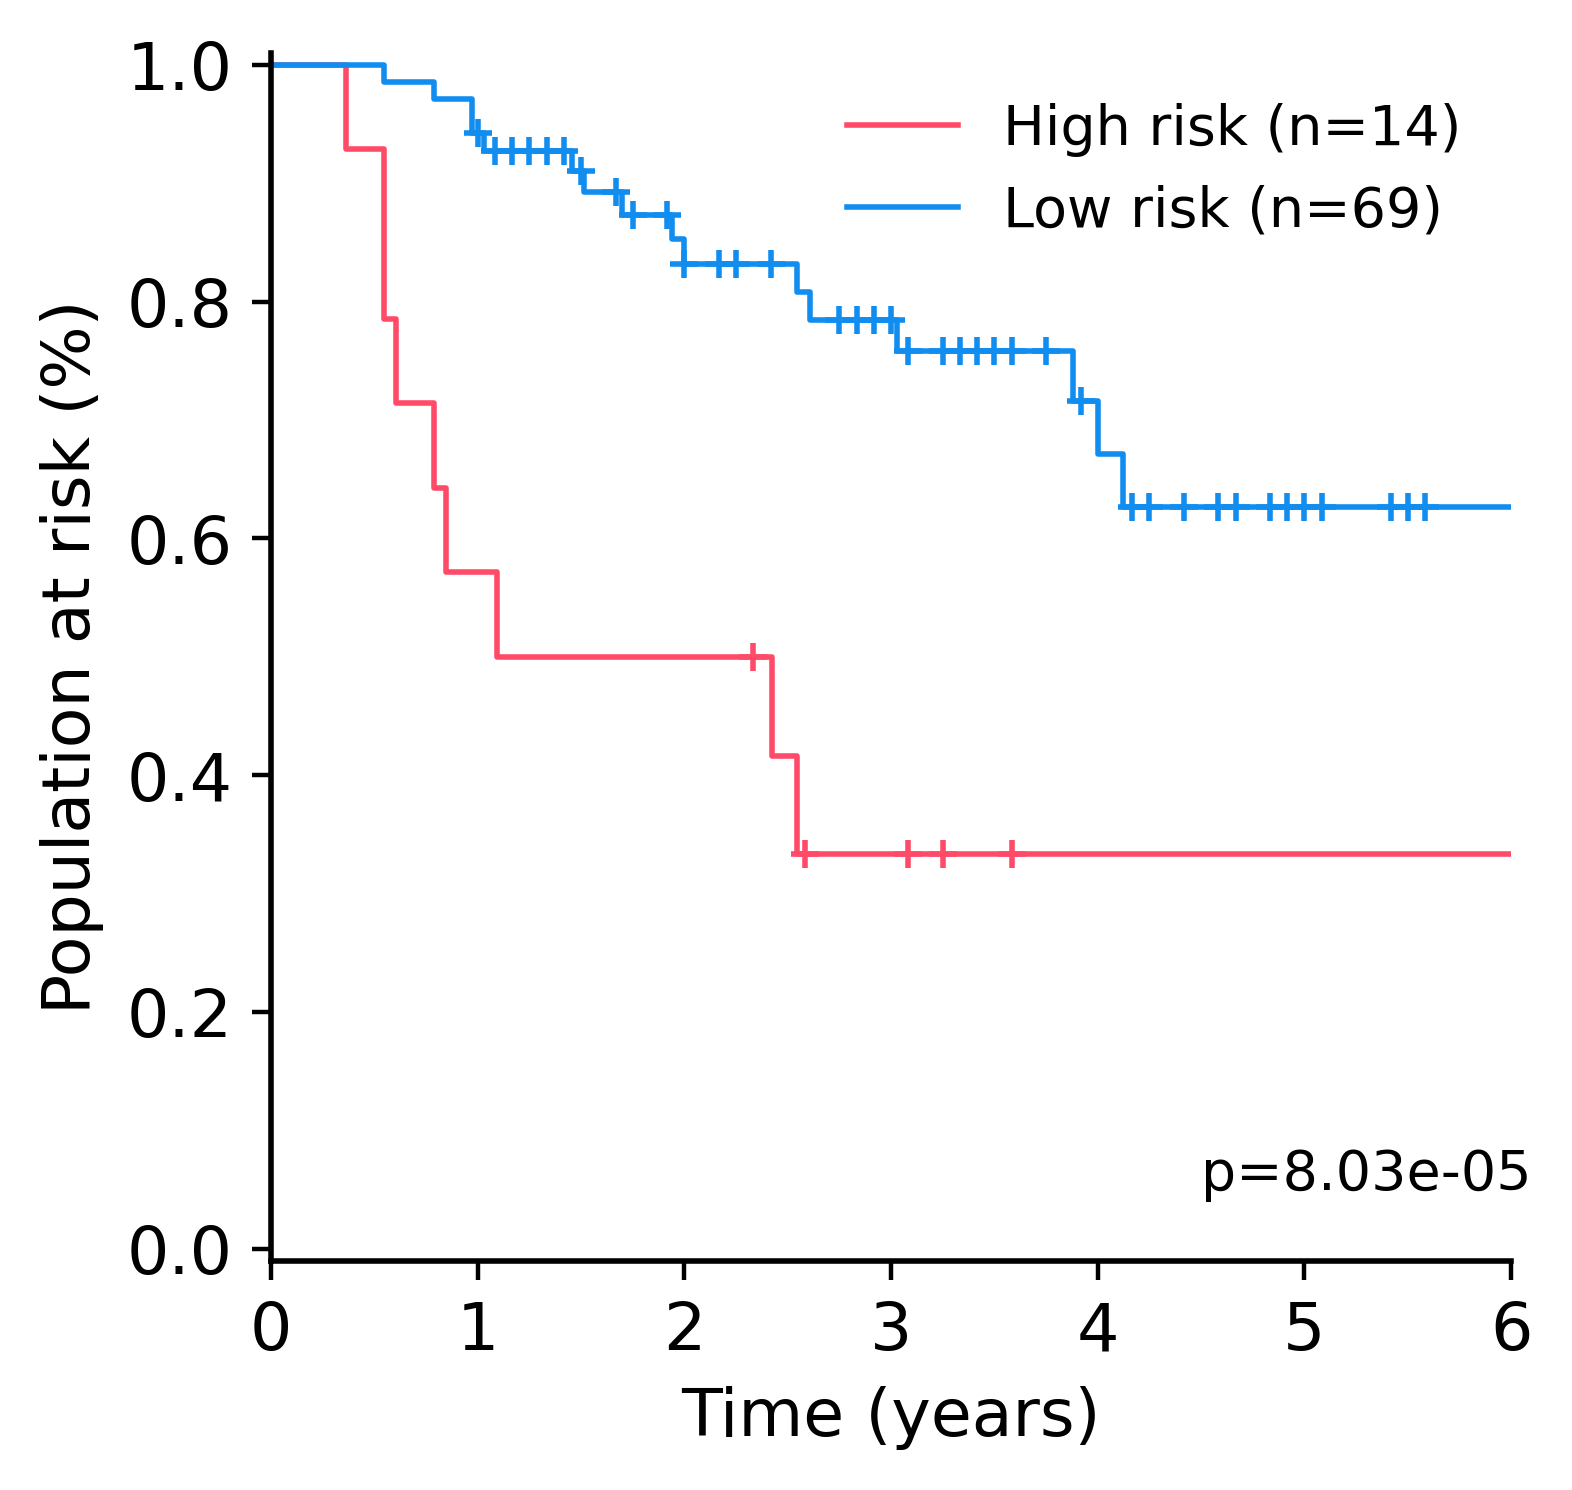

In [199]:
KP_plot(QHCG,'death','TIN10',0.001498605389511)

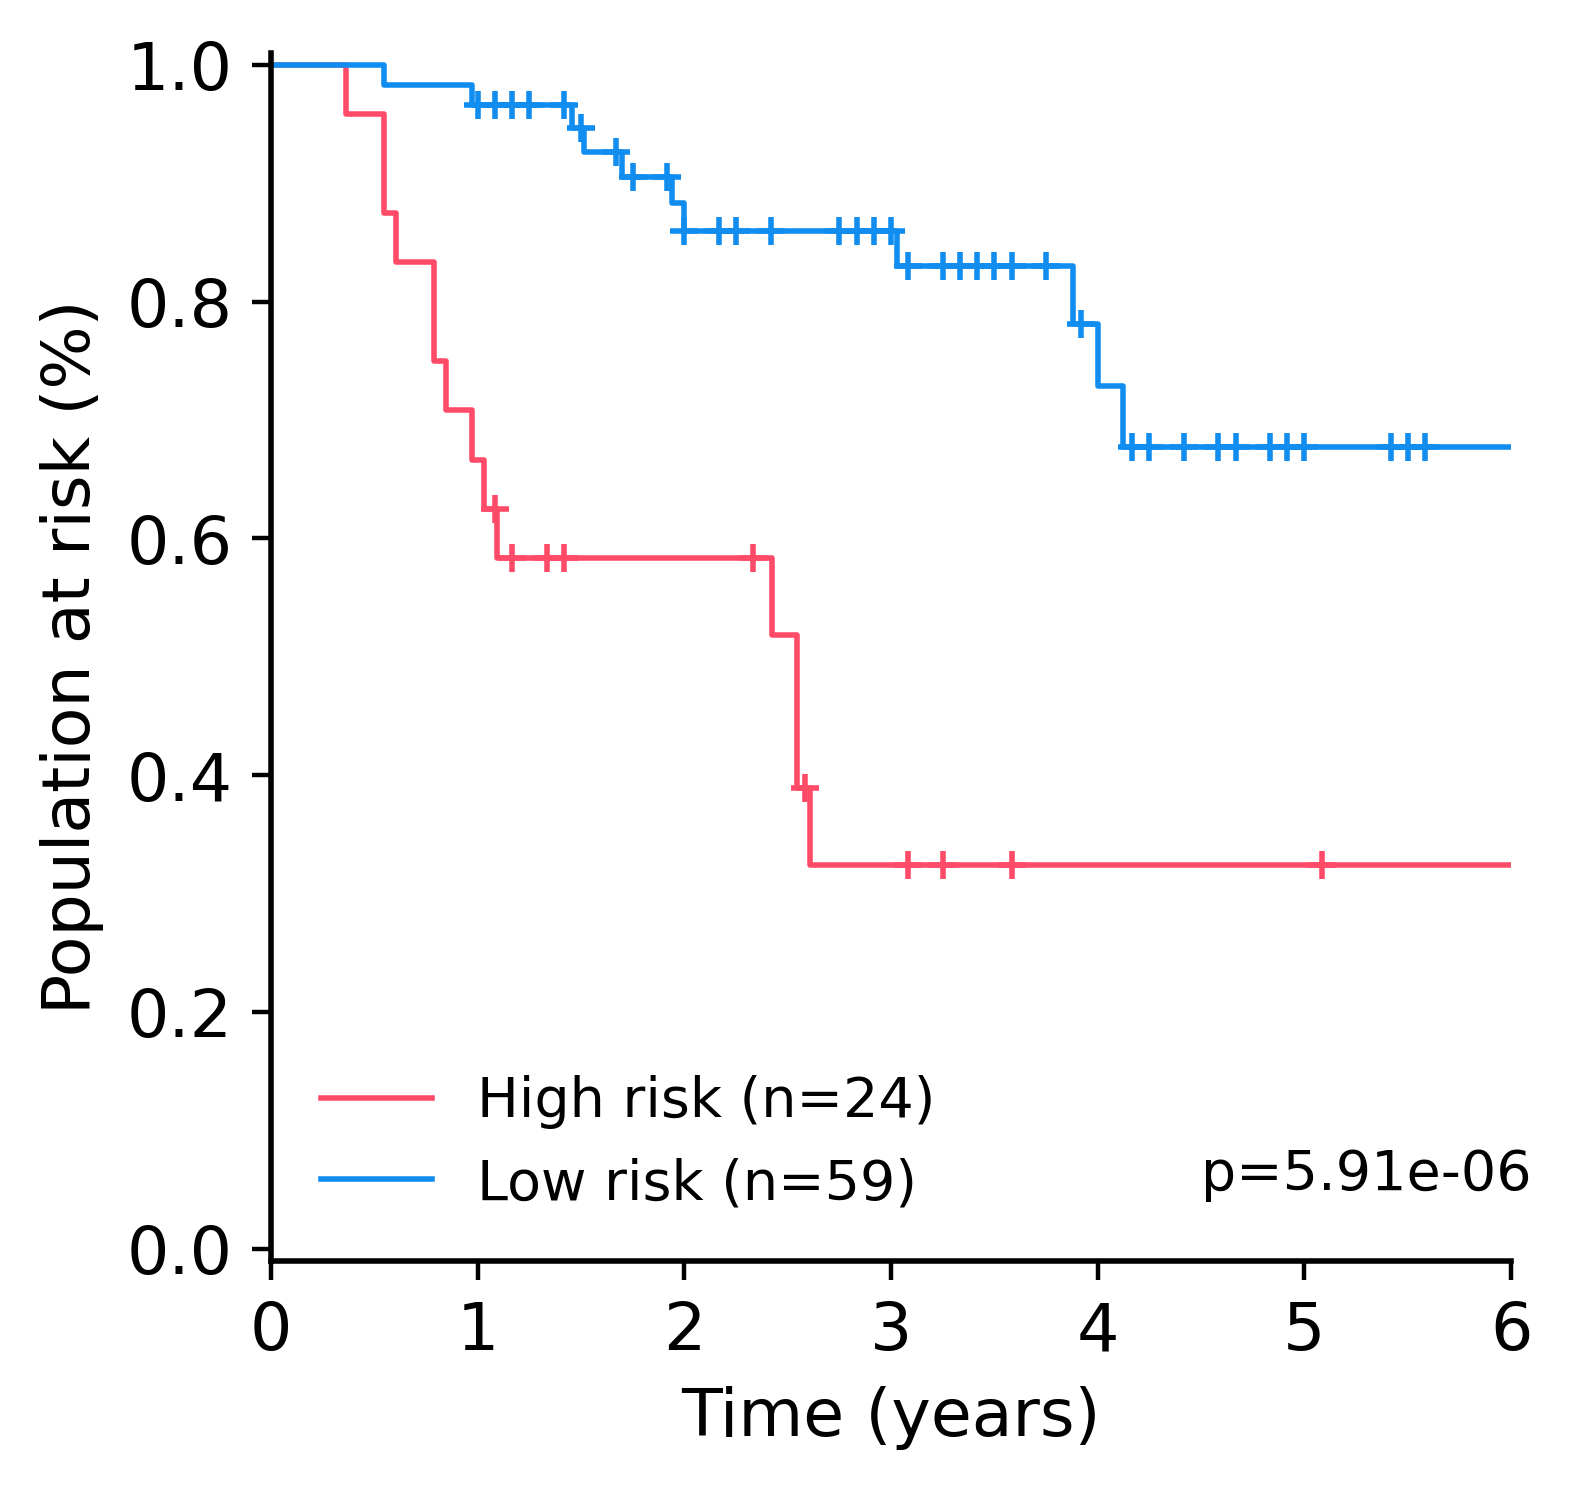

In [200]:
KP_plot(QHCG,'death','NEC',0.018752283151358)

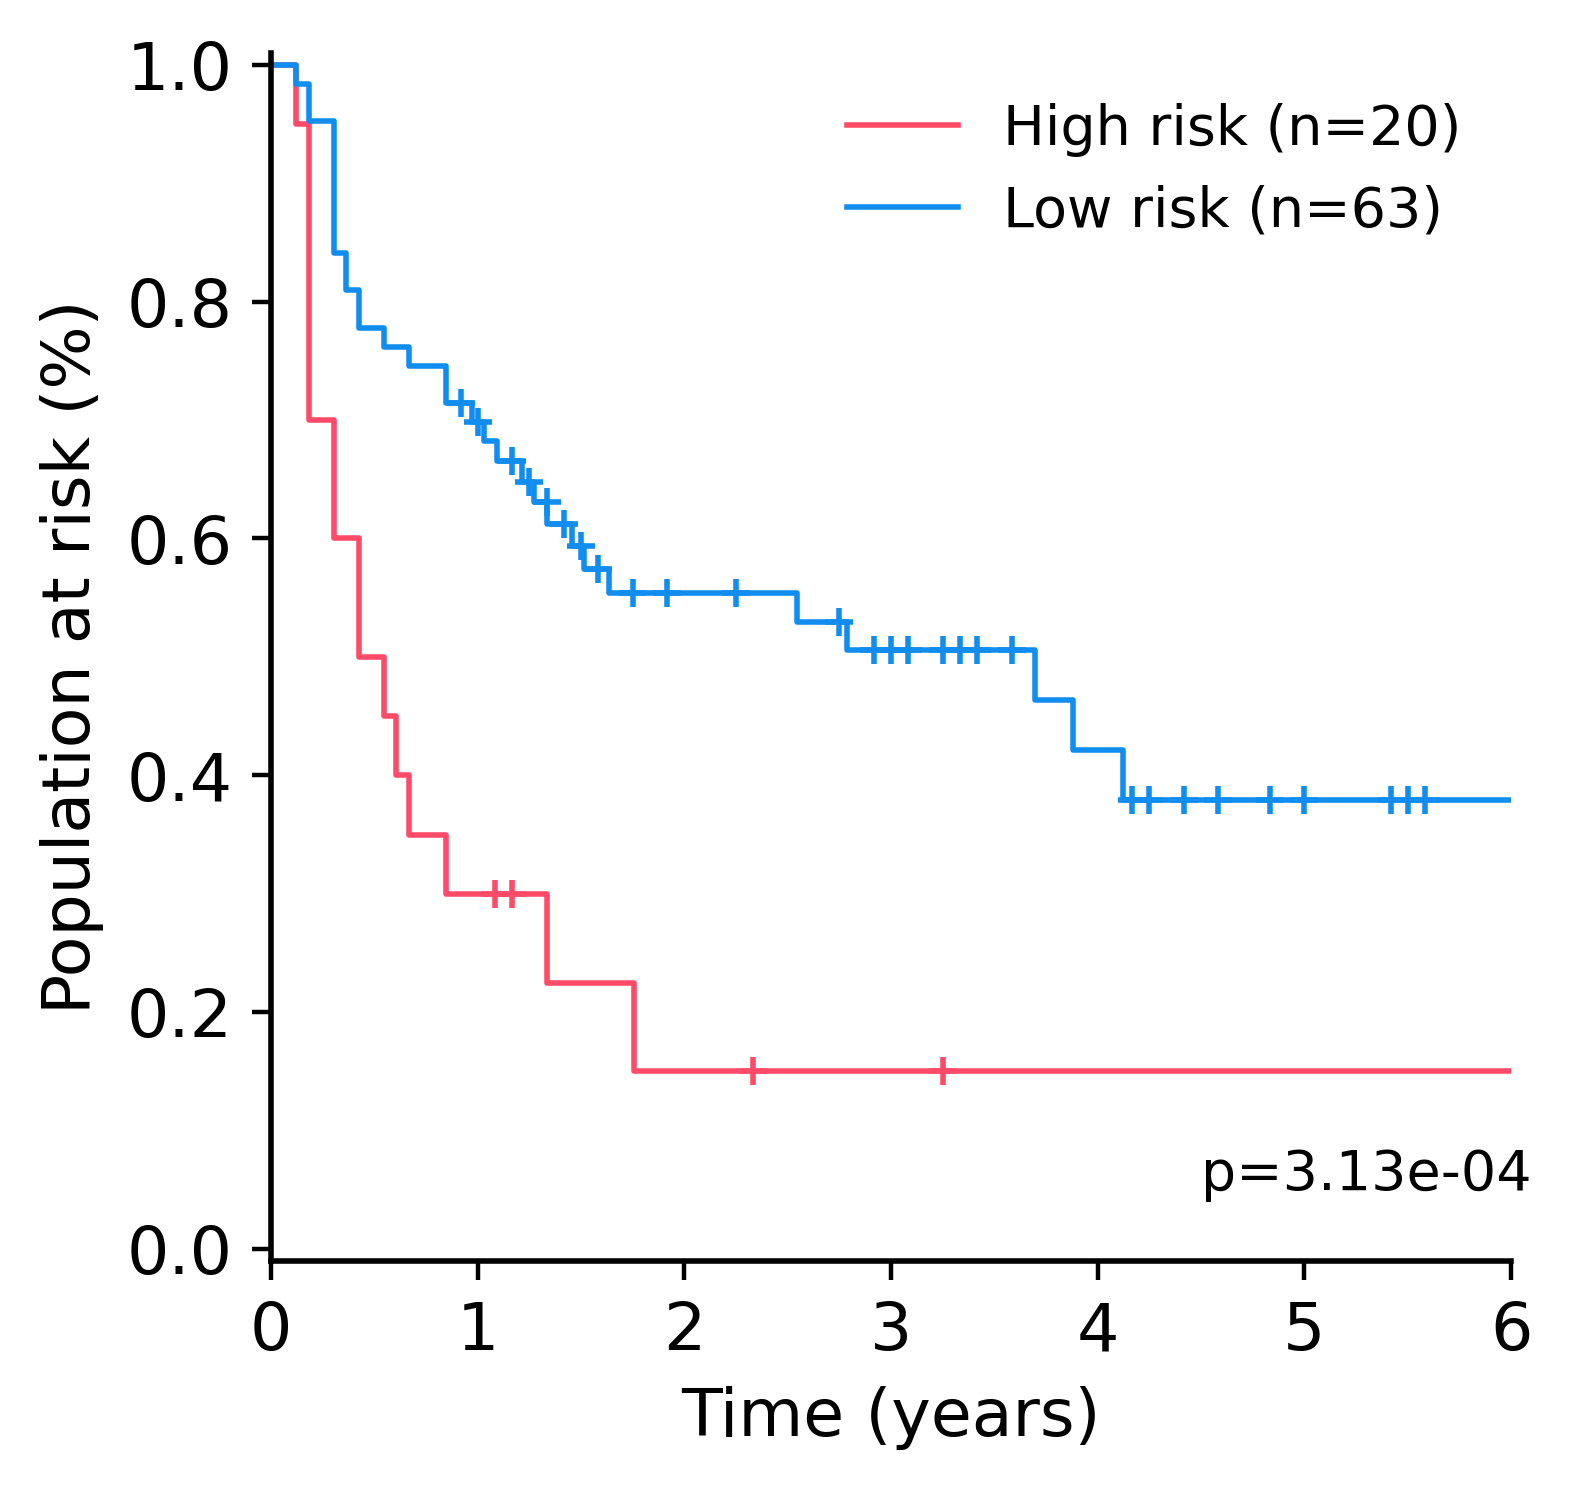

In [201]:
KP_plot(QHCG,'re','TIN10',0.000793778169286)

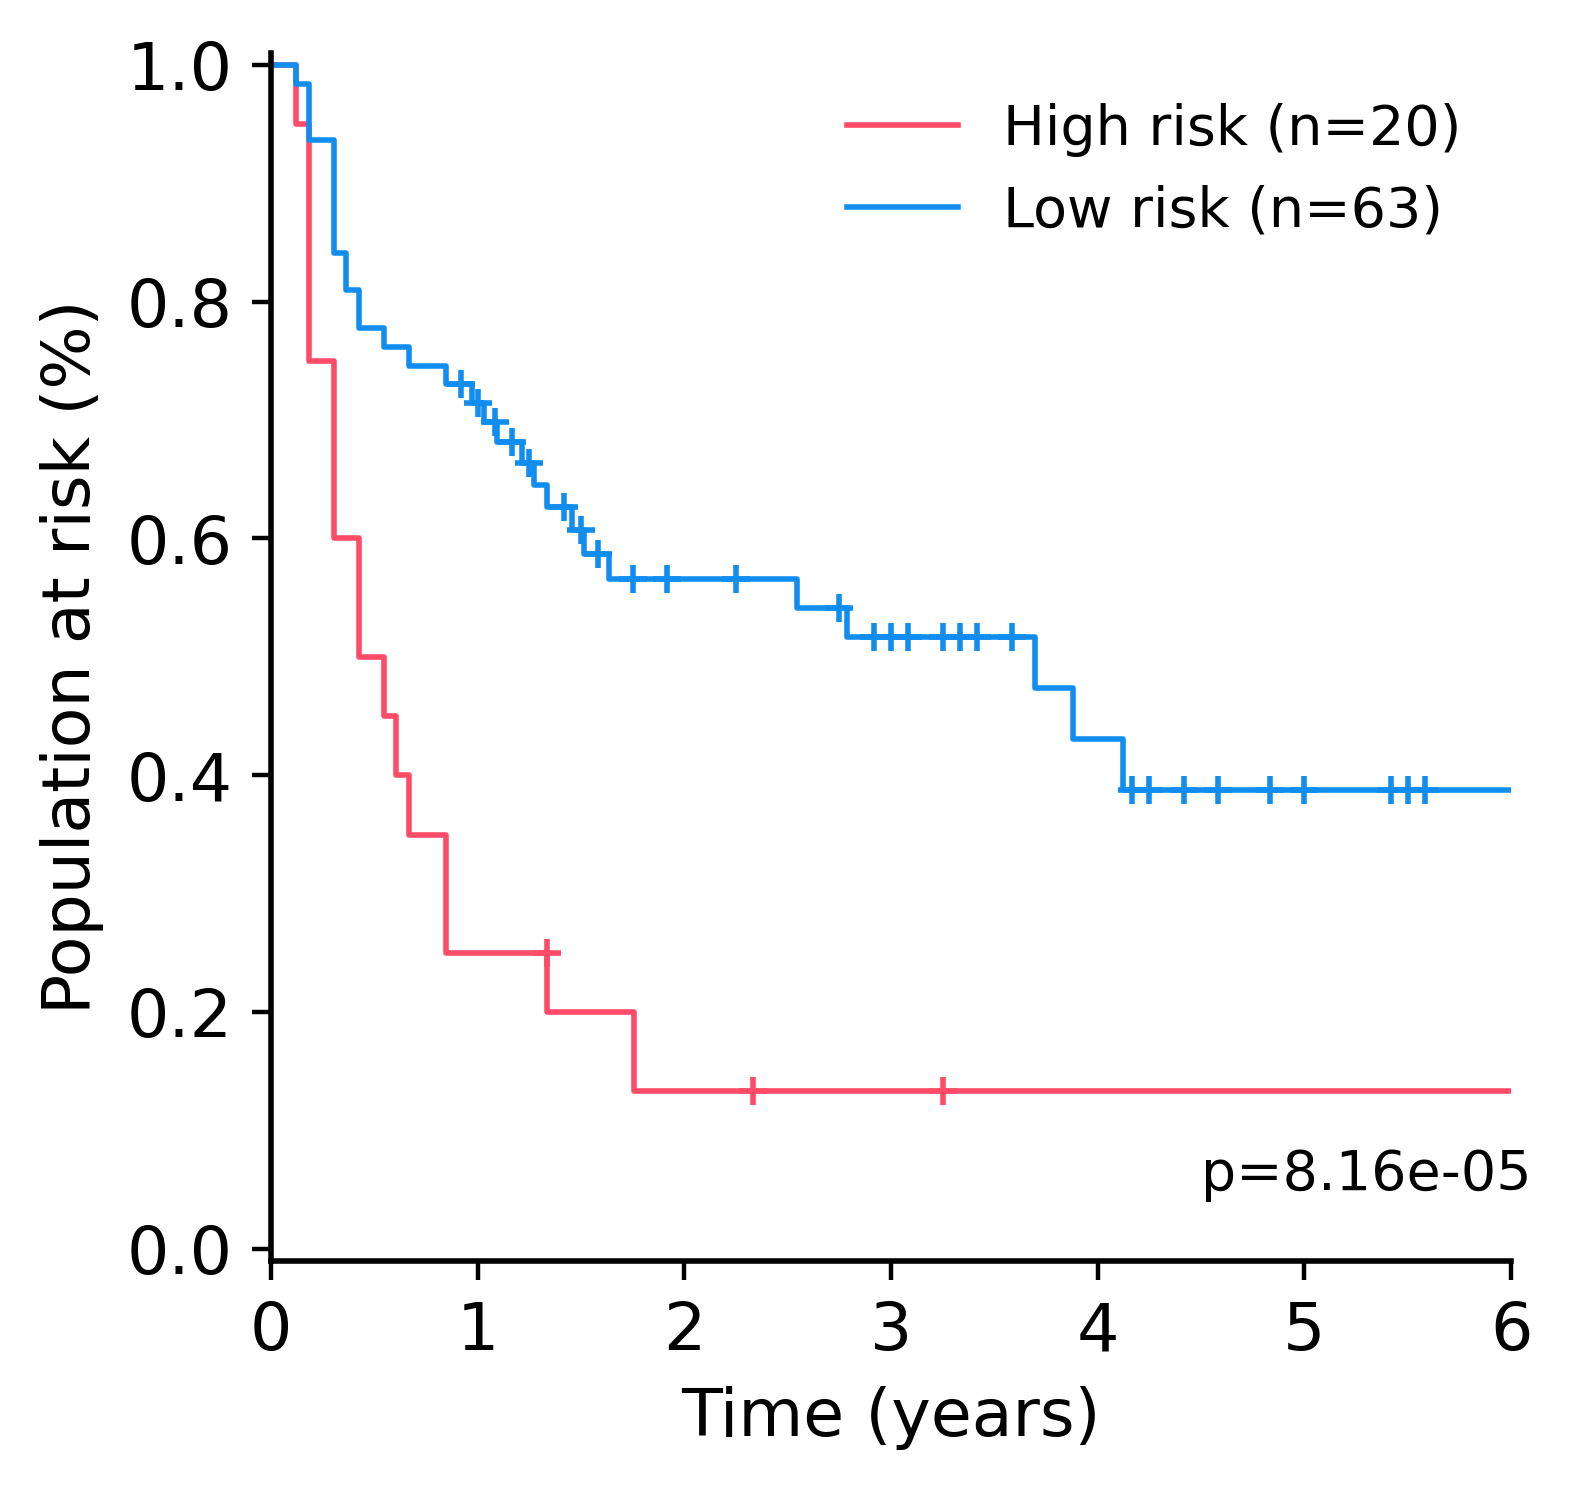

In [202]:
KP_plot(QHCG,'re','NEC',0.023982409490693)

# Multi variance analysis

### TCGA single

In [68]:
TCGA_single

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
TND,1.570304,4.808111,0.317486,0.948043,2.192566,2.580653,8.958171,4.946054,7.573307e-07,20.332573
NEC,0.869780,2.386387,0.226334,0.426174,1.313386,1.531388,3.718745,3.842911,1.215834e-04,13.005766
Stage,0.890136,2.435462,0.194126,0.509657,1.270616,1.664720,3.563047,4.585358,4.532083e-06,17.751394
Risk Score,1.245696,3.475352,0.250591,0.754547,1.736845,2.126648,5.679395,4.971038,6.659553e-07,20.518071
TIL,-0.631224,0.531940,0.193869,-1.011201,-0.251247,0.363782,0.777830,-3.255925,1.130237e-03,9.789159
Age,0.252897,1.287751,0.191815,-0.123054,0.628849,0.884216,1.875450,1.318442,1.873558e-01,2.416147
Prior malignancy,-0.158167,0.853707,0.368377,-0.880174,0.563839,0.414711,1.757407,-0.429361,6.676602e-01,0.582814
Gender,-0.292706,0.746241,0.194893,-0.674690,0.089277,0.509314,1.093384,-1.501880,1.331280e-01,2.909114


### TCGA multi

In [225]:
TCGA_multi.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
covariate,,,,,,,,,,
Stage,0.744889,2.106207,0.201205,0.350535,1.139242,1.419827,3.124401,3.702146,0.000214,12.191560
TIL,-0.461222,0.630513,0.192682,-0.838871,-0.083573,0.432198,0.919824,-2.393701,0.016679,5.905796
NEC,0.608856,1.838327,0.235929,0.146443,1.071269,1.157709,2.919080,2.580673,0.009861,6.664082


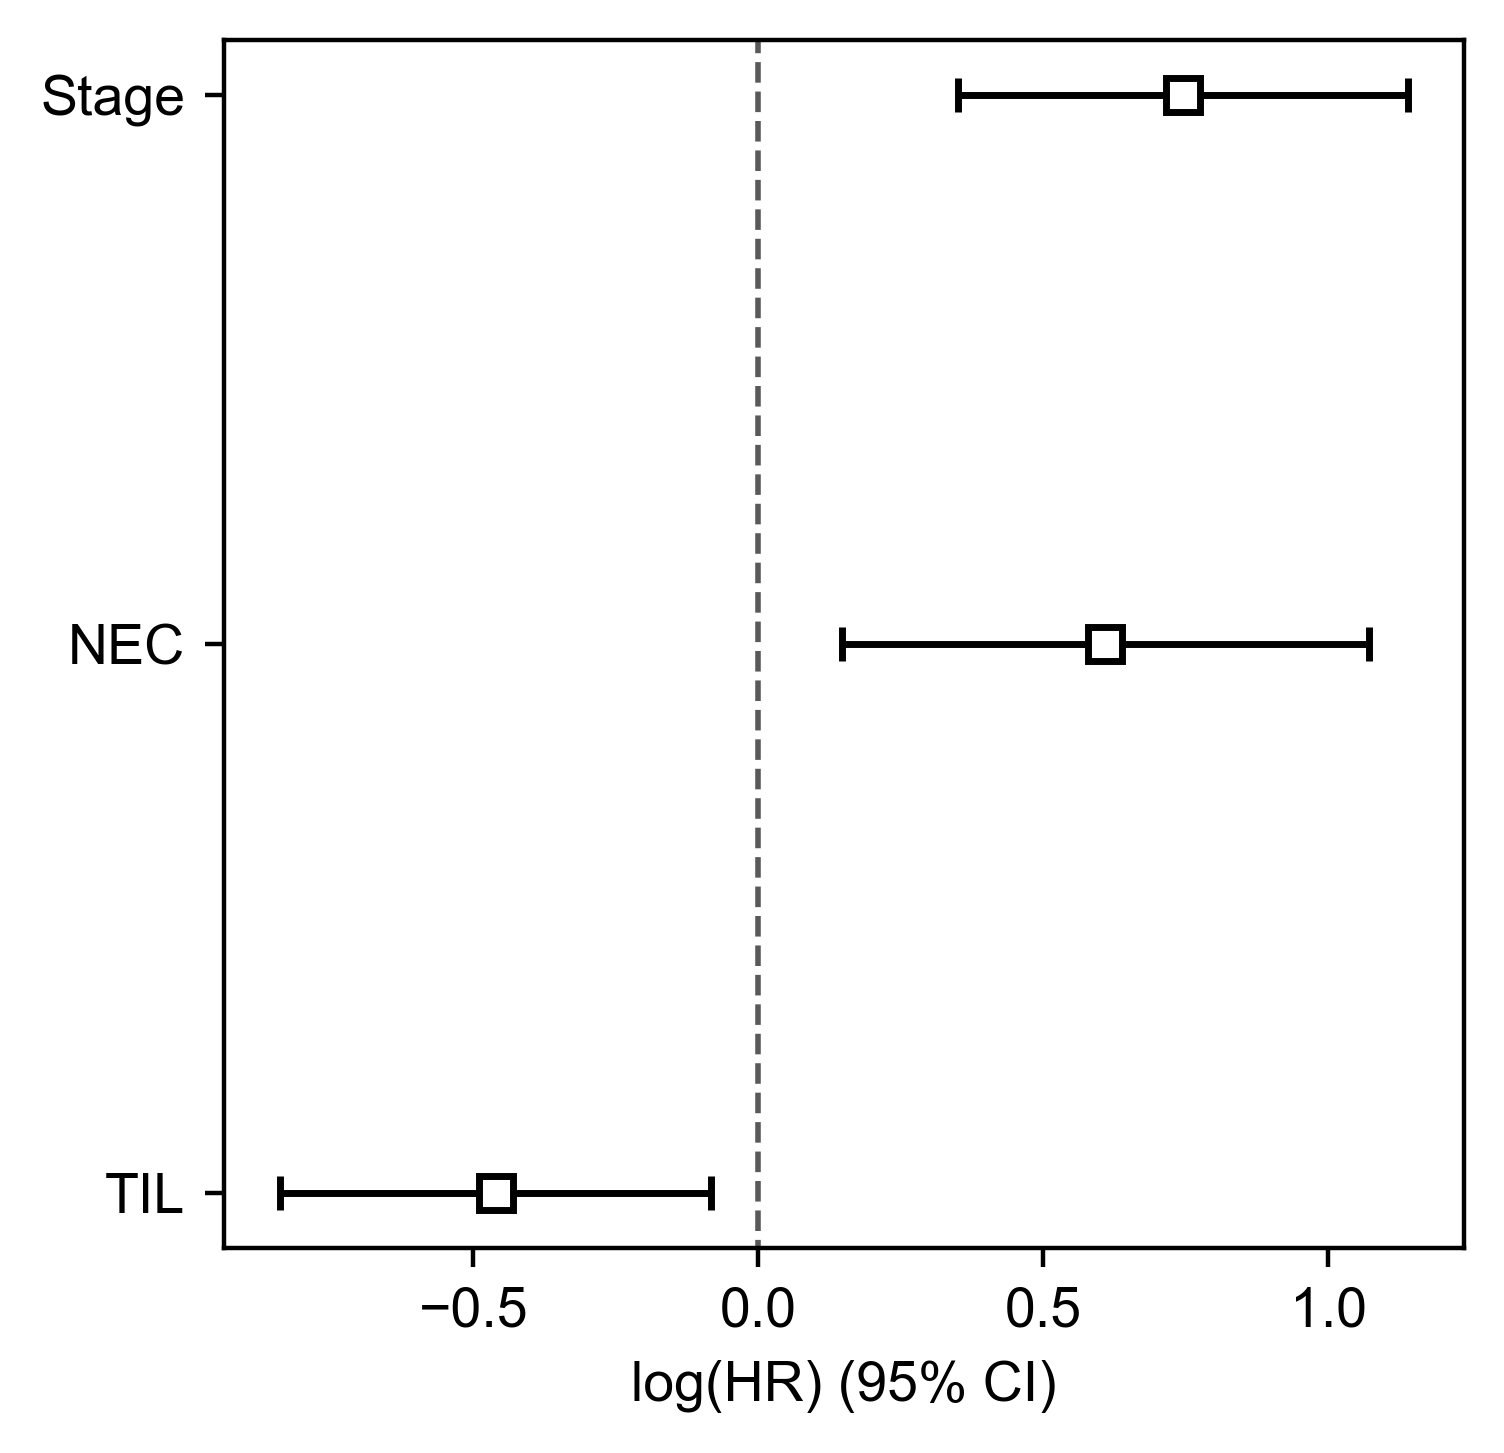

In [227]:
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(4, 4), dpi=400)
ax = plt.subplot(111)
TCGA_multi.plot()

# Variants correlation

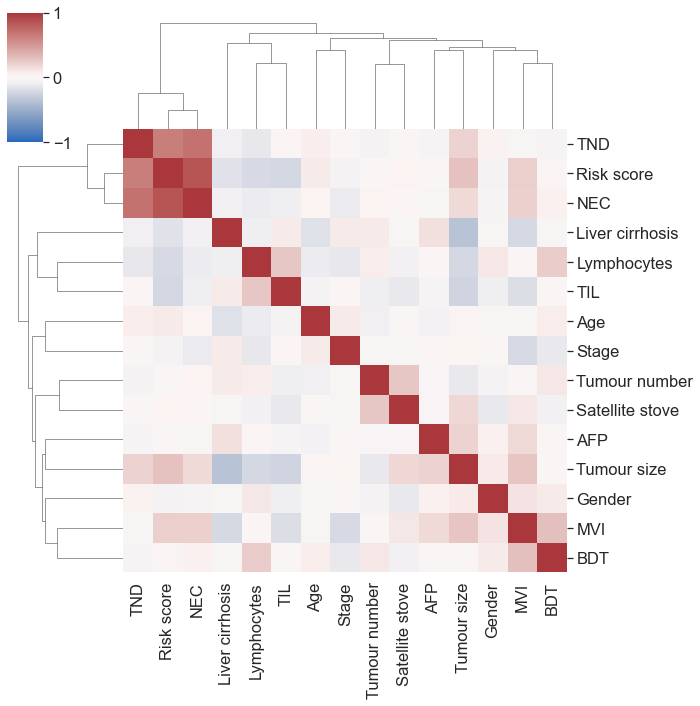

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Arial"
sns.set(font_scale=1.5)


QHCG_test = QHCG[['risk_score','Age','Gender','AFP','Lymphocytes', 'Tumour size','Tumour number', 'Liver cirrhosis', 'Satellite stove', 'MVI', 'BDT', 'Stage','TIL10-min','TIN10','NEC']]
QHCG_test.columns = ['Risk score','Age','Gender','AFP','Lymphocytes', 'Tumour size','Tumour number', 'Liver cirrhosis', 'Satellite stove', 'MVI', 'BDT', 'Stage','TIL','TND','NEC']
QHCG_coor = QHCG_test.corr()
g = sns.clustermap(QHCG_coor,cmap="vlag",vmin=-1, vmax=1)

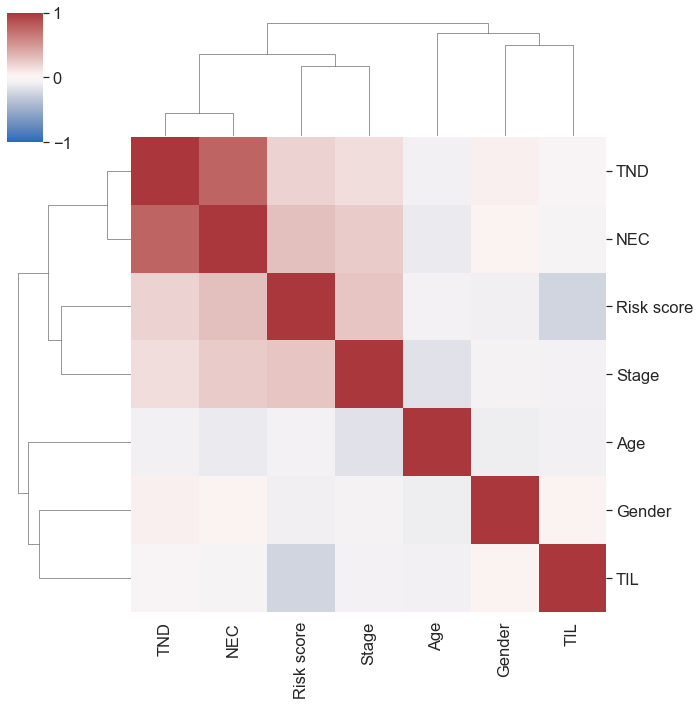

In [26]:
TCGA_test = TCGA[['risk_score','Age','Gender','Stage','TIL10-min','TIN10','NEC']]
TCGA_test.columns = ['Risk score','Age','Gender','Stage','TIL','TND','NEC']
TCGA_coor = TCGA_test.corr()
g = sns.clustermap(TCGA_coor,cmap="vlag",vmin=-1, vmax=1)